In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import numpy as np

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

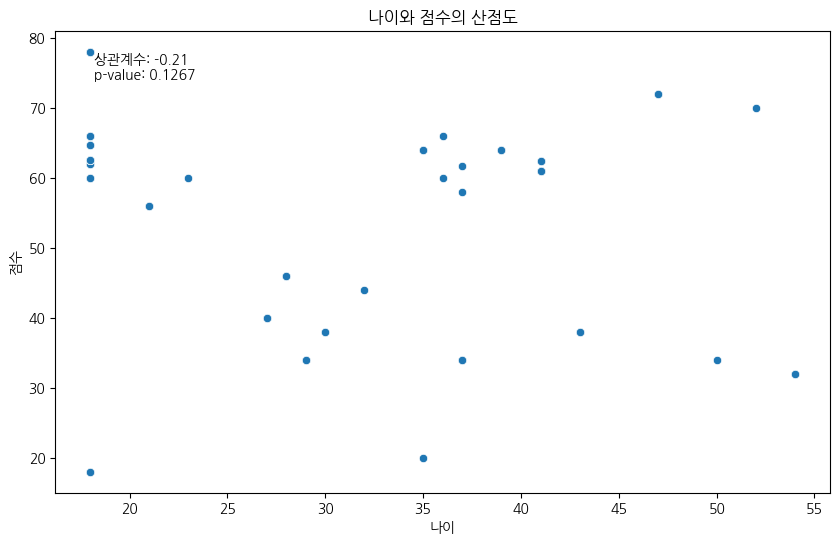

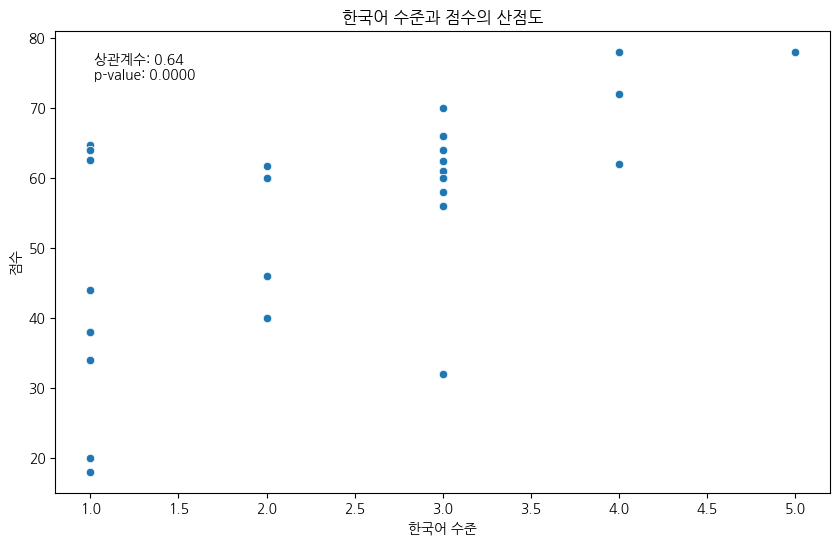

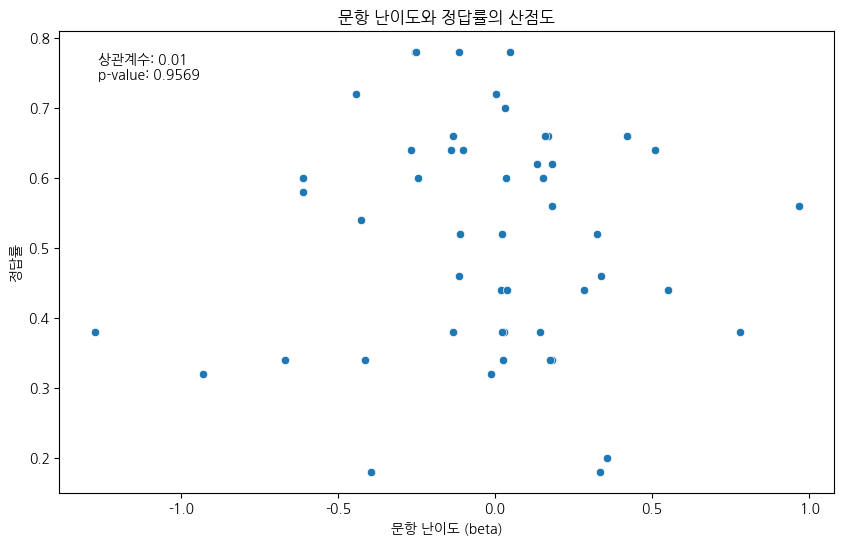

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 데이터 로드
df_questions = pd.read_csv('../exam1.csv')
# 수험자응답정보
df_responses = pd.read_csv('../응답_데이터.csv')
# 문항IRT 분석정보
df_irt = pd.read_csv('../문항_매개변수.csv')
# 수험자 능력정보
df_ability = pd.read_csv('../수험생_능력_추정치.csv')

# 수험자응답정보와 수험자 능력정보를 병합
df = pd.merge(df_responses, df_ability, on='이름')

# 1. 나이와 점수의 산점도 및 상관계수
plt.figure(figsize=(10, 6))
sns.scatterplot(x='나이', y='점수', data=df)
plt.title('나이와 점수의 산점도')
plt.xlabel('나이')
plt.ylabel('점수')

# 상관계수 계산
corr_age_score, p_value = stats.pearsonr(df['나이'], df['점수'])

# 그래프에 상관계수 추가
plt.text(0.05, 0.95, f'상관계수: {corr_age_score:.2f}\np-value: {p_value:.4f}', 
         transform=plt.gca().transAxes, verticalalignment='top')

plt.show()

# 2. 한국어 수준과 점수의 산점도 및 상관계수
# 한국어 수준을 숫자로 변환 (가정: 1, 2, 3, 4, 5로 되어있음)
df['한국어 수준 숫자'] = pd.to_numeric(df['한국어 수준'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='한국어 수준 숫자', y='점수', data=df)
plt.title('한국어 수준과 점수의 산점도')
plt.xlabel('한국어 수준')
plt.ylabel('점수')

# 상관계수 계산
corr_level_score, p_value = stats.pearsonr(df['한국어 수준 숫자'], df['점수'])

# 그래프에 상관계수 추가
plt.text(0.05, 0.95, f'상관계수: {corr_level_score:.2f}\np-value: {p_value:.4f}', 
         transform=plt.gca().transAxes, verticalalignment='top')

plt.show()

# 3. 문항 난이도와 정답률의 산점도
# 정답률 계산
df_irt['정답률'] = df['OX리스트'].apply(lambda x: x.count('O') / len(x))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='난이도 (beta)', y='정답률', data=df_irt)
plt.title('문항 난이도와 정답률의 산점도')
plt.xlabel('문항 난이도 (beta)')
plt.ylabel('정답률')

# 상관계수 계산
corr_diff_correct, p_value = stats.pearsonr(df_irt['난이도 (beta)'], df_irt['정답률'])

# 그래프에 상관계수 추가
plt.text(0.05, 0.95, f'상관계수: {corr_diff_correct:.2f}\np-value: {p_value:.4f}', 
         transform=plt.gca().transAxes, verticalalignment='top')

plt.show()